<a href="https://colab.research.google.com/github/SHAIK-RAIYAN-2022-CSE/KARE/blob/main/Exp1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

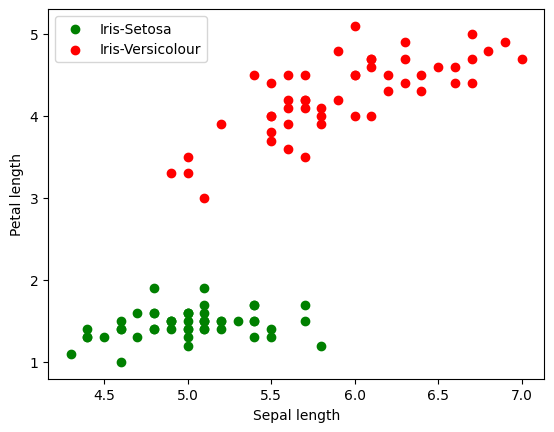

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Error: 0.5
Weights: [22.45037906 10.86394294 17.49615158  5.03646485]
Bias: 5.0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Error: 0.5
Weights: [ 2.50037906 -2.70605706 11.65615158  4.04646485]
Bias: 1.0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Error: 0.5
Weights: [-17.44962094 -16.27605706   5.81615158   3.05646485]
Bias: -3.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Error: 0.5
Weights: [ 6.31037906 -5.14605706 22.76615158  8.39646485]
Bias: 1.0
[1 1 1 1 1 1 1 1 1 

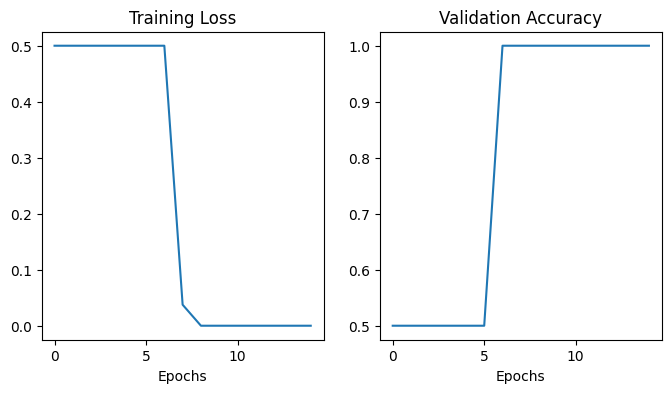

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Set the seed for reproducibility
SEED = 2017

# Load the Iris Plants Database from the CSV file
data_path = "/content/Iris.csv"
iris_df = pd.read_csv(data_path)

# Map species to numerical values
species_to_num = {'Iris-setosa': 0, 'Iris-versicolor': 1}
iris_df = iris_df[iris_df['Species'].isin(species_to_num.keys())]  # Filter the relevant species
iris_df['Species'] = iris_df['Species'].map(species_to_num)

# Extract features and target
X = iris_df.iloc[:, 1:5].values  # Assume the first column is an index column
y = iris_df['Species'].values

# Plot the data for two of the four variables
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 2], color='green', label='Iris-Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 2], color='red', label='Iris-Versicolour')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.show()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Initialize the weights and the bias for the perceptron
weights = np.random.normal(size=X_train.shape[1])
bias = 1

# Define the hyperparameters
learning_rate = 0.1
n_epochs = 15

# Initialize arrays to store the training loss and validation accuracy
hist_loss = []
hist_accuracy = []

# Training the perceptron
for i in range(n_epochs):
    # Apply a simple step function; if the output is > 0.5 we predict 1, else 0
    output = np.where((X_train.dot(weights) + bias) > 0.5, 1, 0)
    print(output)

    # Compute Mean Squared Error (MSE)
    error = np.mean((y_train - output) ** 2)
    print("Error:", error)

    # Update weights and bias
    weights -= learning_rate * np.dot((output - y_train), X_train)
    bias -= learning_rate * np.sum((output - y_train))
    print("Weights:", weights)
    print("Bias:", bias)

    # Calculate MSE
    loss = np.mean((output - y_train) ** 2)
    hist_loss.append(loss)

    # Validate the perceptron
    output_val = np.where((X_val.dot(weights) + bias) > 0.5, 1, 0)
    accuracy = np.mean(np.where(y_val == output_val, 1, 0))
    hist_accuracy.append(accuracy)

# Plot the training loss and validation accuracy
fig = plt.figure(figsize=(8, 4))

a = fig.add_subplot(1, 2, 1)
imgplot = plt.plot(hist_loss)
plt.xlabel('Epochs')
a.set_title('Training Loss')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.plot(hist_accuracy)
plt.xlabel('Epochs')
a.set_title('Validation Accuracy')

plt.show()
